In [47]:
'''
+-------------+---------------------------------------------------+
| APPLICATION:| Prudent Bottomline Data Preprocessing             |
| OS:         | Windows, Unix                                     |
| Module:     | Main                                              |
+-----------------------------------------------------------------+
| NAME: Clustering.ipynb                                          |
+-----------------------------------------------------------------+
| TYPE:                                                           |
| Python code                                                     |
+-----------------------------------------------------------------+
| DESCRIPTION: Clustering and word cloud for taxonomies.          |
|                                                                 |
| OUTPUT: clustering results and top words from word cloud.       |
+-----------------------------------------------------------------+
| Python VERSION:                                                 |
| Python 3.10.9                                                   |
+-----------------------------------------------------------------+
| HISTORY:                                                        |
|                                                                 |
|Solution_architect: Dr.Sarvana                                   |
|Developer-1: Aravind Valluru 4 August 2023 Updated, comments     |
+-----------------------------------------------------------------+
'''

'\n+-------------+---------------------------------------------------+\n| APPLICATION:| Prudent Bottomline Data Preprocessing             |\n| OS:         | Windows, Unix                                     |\n| Module:     | Main                                              |\n+-----------------------------------------------------------------+\n| NAME: Clustering.ipynb                                          |\n+-----------------------------------------------------------------+\n| TYPE:                                                           |\n| Python code                                                     |\n+-----------------------------------------------------------------+\n| DESCRIPTION: Clustering and word cloud for taxonomies.          |\n|                                                                 |\n| OUTPUT: clustering results and top words from word cloud.       |\n+-----------------------------------------------------------------+\n| Python VERSION:              

### Import Statements for all the necessary libraries

In [48]:
from wordcloud import WordCloud
import nltk
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import re
import os
import docx
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import os
import pandas as pd
import xlsxwriter
from nltk.stem import PorterStemmer
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import AgglomerativeClustering
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\AravindDeshikhVallur\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### Input and output parameters

In [49]:
output_path="Output/"
mining_path = "Data_mining/"
Agg_Dendograms="Agg_Dendograms/"
# Suggested best number when not doing forced clustering
no_of_clusters=25
# Number of word combinations to be considered. ex: ngram=3 will give 1 Ngramwords, 2 Ngramwords and 3 Ngramwords
no_ngram=4
# Number of top n words to be considered from the wordcloud of the entire corpus
top_words=1000

### Text Cleaning, Wordcloud generation, Stemming/Lemmetization and Tokenization functions

In [50]:
def simple_cleaning(line):
    # Remove special characters and symbols, keep only alphanumeric characters and spaces.
    line = re.sub(r'[^a-zA-Z0-9\s]', '', line)
    # Replace multiple spaces with a single space.
    line = re.sub(r'\s+', ' ', line)
    # Remove leading and trailing spaces.
    line = re.sub(r'^\s+|\s+$', '', line)
    # Replace multiple spaces with a single space (again, in case there were leading/trailing spaces).
    line = re.sub(r'\s+', ' ', line)
    # Convert the text to lowercase.
    line = line.lower()
    return line

def clean_text(corpus):
    # Perform basic cleaning using the 'simple_cleaning' function.
    basic_cleaned_corpus = simple_cleaning(corpus)
    # Remove specific characters '?', '!', '\'', '#'.
    cleaned_corpus = re.sub(r'[?|!|\'|#|]', r'', basic_cleaned_corpus)
    # Remove specific characters '.', ',', ')', '(', '|', '/'.
    cleaned_corpus = re.sub(r'[.|,|)|(|\|/]', r'', cleaned_corpus)
    # Replace '-' with a space.
    cleaned_corpus = re.sub(r'[-]', r' ', cleaned_corpus)
    # Remove any remaining non-word characters.
    cleaned_corpus = re.sub(r'[^\w]', r' ', cleaned_corpus)
    # Replace multiple spaces with a single space.
    cleaned_corpus = re.sub(r'\s+', r' ', cleaned_corpus)
    # Remove any non-ASCII characters.
    cleaned_corpus = re.sub(r'[^\x00-\x7F]+', ' ', cleaned_corpus)
    # Tokenize the cleaned text into words.
    cleaned = word_tokenize(cleaned_corpus)
    return cleaned
def get_wordcloud(documents, max_words):  
    # Create a WordCloud object 
    wc = WordCloud( max_words=max_words, max_font_size=100, random_state=42)
    # Generate the word cloud
    cloudd=wc.generate(str(documents))
    # Plot the word cloud
    cloud = wc.words_
    return cloud

lemmatizer = nltk.WordNetLemmatizer()

ps = PorterStemmer()
def lem_word(original_word):
    # This function is currently only doing stemming as the results from lemmet are highly biased
    # lemmetisation (uncomment the lines below and comment stemming to use lemmatization, comment the lines to use stemming)
    # line = lemmatizer.lemmatize(original_word, pos ="n")
    # line = lemmatizer.lemmatize(line, pos ="v")
    # line = lemmatizer.lemmatize(line, pos ="a")
    # line = lemmatizer.lemmatize(line, pos ="r")
    # line = lemmatizer.lemmatize(line, pos ="s")
    # return line
    # stemming
    word = ps.stem(original_word)
    return word
def lem_sent(my_line):
    return " ".join([lem_word(x) for x in my_line.split()])

### Hand picked stop words from the corpus plus top of 153 regular english stopwords provided by NLTK library.

In [51]:
manual_stop_words = ['see', 'we', 'know', 'line', 'bottom', 'student', 'it', 'more', 'help', 'In', 'for', 'may', 'You', 'New', 'sure', 'Example', 'able', 'like', 'links', 'set', 'Add', 'Date', 'Not', 'dont', 'get', 'well', 'All', 'add', 'app', 'changes', 'check', 'complete', 'final', 'included', 'part', 'reach', 'specific', 'take', 'Some', 'These', 'even', 'finding', 'fix', 'guide', 'include', 'includes', 'key', 'option', 'please', 'provide', 'self', 'start', 'tasks', 'At', 'Current', 'No', 'Total', 'Update', 'Welcome', 'additional', 'Total', 'Update', 'Welcome', 'additional', 'format', 'forward', 'full', 'identify', 'including', 'least', 'let', 'must', 'often', 'patience', 'recent', 'recently', 'release', 'replace', 'right', 'skills', 'text', 'using', 'would', 'Joined', 'Please', 'Thanks', 'Track', 'Use', 'WHY', 'along', 'blank', 'cars', 'choose', 'choosing', 'conversation', 'egempty', 'ensure', 'every', 'give', 'great', 'important', 'less', 'look', 'lunch', 'made', 'main', 'major', 'mistakes', 'note', 'old', 'per', 'proactively', 'relevant', 'share', 'sing', 'theyre', 'towards', 'way', 'Above', 'Besides', 'Continue', 'Create', 'Edit', 'How', 'There', 'Time', 'View', 'across', 'added', 'allows', 'another', 'to', 'and', 'be', 'of', 'should', 'with', 'is', 'Pipeline', 'are', 'gift', 'year', 'correct', 'will', 'fields', 'any', 'as', 'Close', 'your', 'that', 'been', 'your', 'that', 'been', 'each', 'has', 'around', 'Check', 'The', 'through', 'our', 'an', 'yt', 'feel', 'need', 'meet', 'This', 'body', 'hard', 'here', 'sent', 'sending', 'by', 'so', 'were', 'other', 'into', 'bring', 'At', 'They', 'Not', 'his', 'only', 'while', 'whatever', 'whom', 'Is', 'If', 'us', 'Used', 'or', 'On', 'near', 'TasksBecause', 'Use', 'Count', 'determine', 'do', 'confirm', 'case', 'going', 'Target', 'than', 'who', 'comes', 'etc', 'currently', 'anything', 'Begin', 'via', 'if', 'isnt', 'min', 'max', 'giving', 'her', 'month', 'Latest', 'version', 'Most', 'folx', 'space', 'groups', 'things', 'facilitating', 'what', 'facilitated', 'people', 'doing', 'How', 'feedback', 'care', 'feeling', 'debrief', 'Lo', 'tea', 'once', 'Shanee', 'yt', 'feel', 'need', 'meet', 'facilitator', 'meeting', 'good', 'co', 'enter', 'Why', 'Where', 'scheduled', 'future', 'whether', 'recommendations', 'receive', 'found', 'tbd', 'ach', 'reference', 'These', 'however', 'out', 'adopted', 'instances', 'older', 'suited', 'Below', 'sprint', 'Results', 'ie', 'goes', 'ends', 'loose', 're', 'DQ', 'now', 'List', 'SMS', 'their', 'work', 'about', 'slicer', 'menu', 'which', 'when', 'students', 'role', 'Col', 'Image', 'related', 'print', 'form', 'Numerator', 'Active', 'career', 'karaoke', 'best', 'Shown', 'blurb', 'click', 'inside', 'attempt', 'Shown', 'blurb', 'click', 'inside', 'attempt', 'different', 'Null', 'divide', 'functions', 'place', 'order', 'h', 'k', 'v', 'aa', 'ak', 'bi', 'bl', 'bu', 'ca', 'ce', 'cs', 'dy', 'eg', 'em', 'ew', 'fd', 'fy', 'gr', 'hr', 'id', 'il', 'im', 'ir', 'lj', 'ny', 'od', 'op', 'pb', 'pd', 'pm', 'qa', 'rt', 'sd', 'se', 'sf', 'sh', 'ui', 'us', 'wa', 'ago', 'aid', 'aim', 'ask', 'bar', 'box', 'bug', 'buy', 'cca', 'cce', 'cci', 'cct', 'ceo', 'cfo', 'chi', 'cip', 'cpa', 'csv', 'dax', 'day', 'dei', 'doc', 'doe', 'due', 'efc', 'emp', 'eoy', 'est', 'faq', 'far', 'feb', 'fee', 'fit', 'fun', 'gap', 'gen', 'gpa', 'inc', 'irs', 'jan', 'job', 'jog', 'kit', 'lab', 'lay', 'log', 'lot', 'man', 'map', 'mar', 'men', 'mid', 'mvp', 'ncp', 'nov', 'npr', 'nsc', 'nyc', 'nyr', 'obl', 'one', 'org', 'otp', 'pbi', 'pdf', 'pop', 'pre', 'put', 'rat', 'raw', 'rct', 'red', 'rep', 'row', 'run', 'sap', 'sar', 'say', 'sex', 'sit', 'six', 'soy', 'sum', 'tab', 'tap', 'tax', 'tba', 'tbf', 'tie', 'tip', 'ton', 'top', 'tps', 'try', 'two', 'uat', 'umb', 'web', 'wfr', 'yet', 'zip', 'also', 'alum', 'apex', 'apps', 'area', 'away', 'back', 'base', 'beta', 'bind', 'blue', 'bold', 'buff', 'call', 'card', 'cbos', 'cell', 'chat', 'club', 'code', 'coop', 'copy', 'core', 'cost', 'cres', 'csvs', 'daca', 'dash', 'data', 'deal', 'debt', 'deem', 'dell', 'demo', 'dlrs', 'docu', 'drop', 'earn', 'easy', 'ecmc', 'exam', 'exit', 'face', 'fact', 'fail', 'fall', 'fill', 'fire', 'firm', 'five', 'flow', 'four', 'free', 'gain', 'goal', 'grad', 'grow', 'half', 'hand', 'hear', 'hide', 'high', 'hint', 'hire', 'home', 'hood', 'hope', 'hour', 'huge', 'hyde', 'icon', 'idea', 'info', 'item', 'july', 'june', 'keep', 'kick', 'kind', 'lack', 'land', 'last', 'lead', 'life', 'live', 'loan', 'logo', 'long', 'loop', 'lori', 'lose', 'love', 'mail', 'male', 'many', 'mean', 'mega', 'miss', 'mock', 'mode', 'move', 'much', 'name', 'next', 'nice', 'norm', 'ohio', 'okay', 'open', 'pace', 'page', 'pair', 'pass', 'past', 'path', 'pbix', 'pell', 'plan', 'play', 'post', 'prep', 'pull', 'quit', 'race', 'rank', 'rare', 'rate', 'read', 'real', 'rely', 'rest', 'rich', 'risk', 'road',  'rule', 'save', 'seek', 'seem', 'sept', 'side', 'sign', 'site', 'size', 'soon', 'span', 'spot', 'stay', 'step', 'stop', 'sync', 'talk', 'team', 'tech', 'tell', 'term', 'test', 'thru', 'thus', 'tire', 'tool', 'trip', 'tune', 'type', 'uats', 'upon', 'user', 'vary', 'vast', 'wage', 'wait', 'walk', 'want', 'wave', 'week', 'weve', 'wide', 'wire', 'wish', 'wont', 'word', 'wrap', 'abuse', 'adapt', 'admit', 'agile', 'ahead', 'alert', 'align', 'alone', 'andor', 'apply', 'april', 'arent', 'arise', 'arrow', 'asian', 'audit', 'avail', 'avoid', 'award', 'azure', 'basic', 'basis', 'birth', 'black', 'block', 'board', 'break', 'brief', 'broad', 'build', 'carry', 'catch', 'cause', 'chart', 'child', 'claim', 'class', 'clear', 'clone', 'cloud', 'coach', 'color', 'could', 'cover'] + ['see', 'we','abandon', 'abil', 'abroad','acceptedattend', 'acceptedprovision', 'acceptop', 'accru', 'accumul','adddrop', 'address', 'adjust', 'administr', 'adminop','authent', 'averag', 'awardlett', 'awesom','becaus', 'becom', 'befor', 'began', 'behind', 'believ', 'belong', 'belov', 'better', 'beyond', 'biolog', 'birthday', 'bought', 'bound', 'brain','broken', 'brought', 'brows', 'browser', 'bucket','buffer', 'builder', 'built', 'bulk', 'busi', 'button', 'bynam', 'byyear', 'calcul', 'came', 'camera','cancel', 'candid', 'capac', 'captur','categori', 'caution', 'celebr', 'center', 'central', 'certain','collegi', 'colorcod', 'column', 'columnsexport', 'combin', 'comfort', 'comment', 'commit', 'common', 'commonli', 'commun', 'compani', 'compar', 'comparison', 'compens', 'compet', 'competit', 'compil', 'completecheckbox', 'complex', 'complic', 'compliment', 'compon', 'compos', 'composit', 'comprehens', 'comput', 'concat', 'concaten', 'concret', 'condit', 'conduc', 'conduct', 'confid', 'confus', 'congratul', 'conjunct', 'connect', 'connectioncheckbox', 'connectionscheckbox', 'connector', 'consequ', 'consid', 'consider', 'consist', 'constantli', 'construct', 'consult', 'contact', 'contain', 'content', 'context', 'continent', 'contract', 'contribut', 'control', 'conveni', 'coopinternship', 'coordin', 'corner', 'corpor', 'correctli', 'coupl', 'cours', 'craft', 'creativ', 'credenti', 'credit', 'criteria', 'critic', 'crucial', 'css', 'cssrequiredpriorityschoolsc', 'csssubmittedc', 'csssubmittedpriorityschoolsc', 'cultur', 'cumul', 'curios', 'curiou','curriculumknowledg', 'custodi', 'cycl', 'daili','dataloaderio','datto', 'daunt', 'deactiv', 'deadlin', 'debut', 'deceas', 'decemb', 'decid', 'decis', 'declar', 'default', 'defin', 'definit', 'degre', 'degreegr', 'delay', 'delet', 'deliv', 'deliveri', 'demand', 'demograph', 'demonstr', 'denomin', 'depart', 'depend', 'deploy', 'depriorit', 'derek', 'descript', 'design', 'desir', 'desktop', 'destin', 'detail', 'detour','devic', 'devot', 'dialogu', 'dictionari', 'didnt', 'die', 'difficult', 'digit','directli', 'director', 'disast', 'discontinu', 'discourag', 'discov', 'discoveri', 'discret', 'discrimin', 'discuss', 'disfordegre', 'disloc', 'displac', 'display', 'disrupt', 'distinct', 'distribut', 'divers', 'divorc','elig', 'ellips', 'ellipsi', 'els', 'email', 'embed', 'emileston', 'emili', 'emindividu', 'emnarrow', 'emot', 'empathi', 'emphas', 'empti', 'emunderstand', 'encourag', 'enforc', 'engag', 'enjoy', 'enough', 'enrol', 'entir', 'entranc', 'entri', 'entrystatuscfin', 'environ', 'equal', 'equival', 'erika', 'error', 'especi', 'essay', 'essenti', 'establish', 'estat', 'estim', 'ethnic', 'evalu', 'everyon', 'everyth', 'evolv', 'exactli', 'exceed', 'excel', 'excelpbi', 'except', 'excerpt', 'excit', 'exclud', 'exclus', 'execut', 'exempt', 'exist', 'expand', 'expans', 'expect', 'expens', 'experi', 'experienc', 'expert', 'explain', 'explan', 'explor', 'export', 'express', 'extend', 'extens', 'extern', 'extra', 'factor', 'fafsa', 'fafsaelig', 'fallspr', 'fals', 'famili', 'fanci', 'fdannualsalaryc', 'fdcalculatedannualsalaryc', 'fdcareerrelatedreportingd', 'fdemployedreportingdatec', 'fdgradschoolreportingdatec', 'fdmobilizingreportingdatec', 'fdstablereportingdatec', 'featur', 'februari', 'feder', 'feed', 'feedbackwhat','fifth', 'figur', 'filter', 'fine', 'fingertip', 'finish', 'first', 'fiscal', 'flatten', 'flexibl', 'focu', 'focus', 'folder', 'follow', 'followup', 'foodhousingtransport', 'footprint', 'forc', 'formal', 'formerli', 'formula', 'formulaaggreg', 'forum', 'foster', 'foundat', 'fourth', 'fouryear', 'fpanalysisisdon', 'fpmakefieldunedit', 'freez', 'frequenc', 'frequent', 'fresh','frozen', 'frustrat', 'fulfil', 'fulltim', 'functionalcomplet','gather', 'gaug','given', 'glanc','googl', 'got', 'govern','hold', 'holdov', 'homeless', 'homemak', 'hone', 'hospit', 'hourli', 'hous', 'household', 'hover', 'howto', 'hstranscript','ibc', 'ideal', 'ideat', 'ident', 'immedi', 'immigr', 'impact', 'implement', 'impromptu', 'improv', 'inaccuraci', 'inact', 'inapp', 'incarcer', 'inclus', 'incom', 'incomeloss', 'incorrect', 'increas', 'incred', 'increment', 'indashboard', 'independ', 'indic', 'indirect', 'individu', 'industri', 'inelig', 'influenc', 'inform', 'infranet', 'initi', 'innov', 'input', 'inquir', 'inquiri', 'inregion', 'insandoutseven', 'insert', 'insight', 'inspect','institution', 'instruct', 'insur', 'insurmount', 'intak', 'intend', 'interact', 'interest', 'intermedi','jump', 'juneearli', 'karla', 'kept','knowledg', 'known', 'label', 'laid', 'languag', 'largest', 'lastengagementdatesuccessc', 'lastmost', 'lastpass', 'late', 'later', 'latin','learn', 'leav', 'led', 'left', 'legal', 'legitim', 'lehman', 'length', 'letter', 'level', 'leverag', 'librari', 'lifelong', 'lifestyl', 'limit', 'linebylin', 'linkexplain', 'linksn', 'lisforlif', 'listen', 'listmak', 'local', 'locat', 'logic', 'login', 'logist', 'longer', 'longlist', 'longterm', 'lookup', 'lost', 'maintain', 'make', 'makeov', 'maletransgend', 'manag', 'manner', 'manual', 'march', 'marit', 'marri', 'mass', 'master', 'match', 'materi','mcpsa', 'meaning', 'meant', 'meantim', 'measur', 'mechan', 'medit', 'meetingstask', 'melissa', 'member', 'memori', 'mental', 'merit', 'messag', 'met', 'method', 'methodolog', 'metric', 'michael', 'michel','mind', 'miniatur', 'minim', 'minut', 'misalign', 'mobil', 'model', 'modif', 'modifi', 'monday','moneyrel', 'monitor', 'monthli', 'morn', 'multipl', 'multiracialoth', 'multiyear', 'mysteri', 'narr', 'narrow', 'nativ', 'natur', 'navig', 'nearli', 'neatli', 'necessari', 'network', 'never', 'newli', 'nextengagementdatesuccessc', 'nextengagementdatesuccesscset', 'nextupcom', 'nicknam', 'nonbinarythird', 'nonblank', 'nonconforminggend', 'noncreditearn', 'noncustodi', 'nondistrict','worri', 'write', 'writeup', 'writingintens', 'xaxi', 'ye', 'yellow', 'youd', 'youll', 'young', 'yourselfkeep', 'yourselv', 'youv', 'yyyymmdd', 'zero','voic', 'volunt', 'waiver', 'walton', 'wareh', 'warehous', 'warn', 'watch', 'wed', 'wednesday', 'weekli', 'weigh', 'wellb', 'werent', 'whereabout', 'white', 'whose', 'wider', 'widget', 'winter', 'withdraw', 'withdrawn', 'withdrew','concis', 'know', 'line', 'bottom', 'student', 'it', 'more', 'help', 'In', 'for', 'may', 'You', 'New', 'sure', 'Example', 'able', 'like', 'links', 'set', 'Add', 'Date', 'Not', 'dont', 'get', 'well', 'All', 'add', 'app', 'changes', 'check', 'complete', 'final', 'included', 'part', 'reach', 'specific', 'take', 'Some', 'These', 'finding', 'fix', 'include', 'includes', 'key', 'option', 'please', 'provide', 'self', 'start', 'tasks', 'At', 'Current', 'No', 'Total', 'Update', 'Welcome', 'additional', 'Total', 'Update', 'Welcome', 'additional', 'format', 'forward', 'full', 'identify', 'including', 'least', 'let', 'must', 'often', 'patience', 'recent', 'recently', 'release', 'replace', 'right', 'skills', 'text', 'using', 'would', 'Joined', 'Please', 'Thanks', 'Track', 'Use', 'WHY', 'along', 'blank', 'cars', 'choose', 'choosing', 'conversation', 'egempty', 'ensure', 'every', 'give', 'great', 'important', 'less', 'look', 'lunch', 'made', 'main', 'major', 'mistakes', 'note', 'old', 'per', 'proactively', 'relevant', 'share', 'sing', 'theyre', 'towards', 'way', 'Above', 'Besides', 'Continue', 'Create', 'Edit', 'How', 'There', 'Time', 'View', 'across', 'added', 'allows', 'another', 'to', 'and', 'be', 'of', 'should', 'with', 'is', 'Pipeline', 'are', 'gift', 'year', 'correct', 'will', 'fields', 'any', 'as', 'Close', 'your', 'that', 'been', 'your', 'that', 'been', 'each', 'has', 'around', 'Check', 'The', 'through', 'our', 'an', 'yt', 'feel', 'need', 'meet', 'This', 'body', 'hard', 'here', 'sent', 'sending', 'by', 'so', 'were', 'other', 'into', 'bring', 'At', 'They', 'Not', 'his', 'only', 'while', 'whatever', 'whom', 'Is', 'If', 'us', 'Used', 'or', 'On', 'near', 'TasksBecause', 'Use', 'Count', 'determine', 'do', 'confirm', 'case', 'going', 'Target', 'than', 'who', 'comes', 'etc', 'currently', 'anything', 'Begin', 'via', 'if', 'isnt', 'min', 'max', 'giving', 'her', 'month', 'Latest', 'version', 'Most', 'folx', 'space', 'groups', 'things', 'facilitating', 'what', 'facilitated', 'people', 'doing', 'How', 'feedback', 'care', 'feeling', 'debrief', 'Lo', 'tea', 'once', 'Shanee', 'yt', 'feel', 'need', 'meet', 'facilitator', 'meeting', 'good', 'co', 'enter', 'Why', 'Where', 'scheduled', 'future', 'whether', 'receive', 'found', 'tbd', 'ach', 'reference', 'These', 'however', 'out', 'adopted', 'instances', 'older', 'suited', 'Below', 'sprint', 'project', 'Results', 'ie', 'goes', 'ends', 'loose', 're', 'DQ', 'now', 'List', 'SMS', 'their', 'work', 'about', 'slicer', 'menu', 'which', 'when', 'students', 'role', 'Col', 'Image', 'related', 'print', 'form', 'Numerator', 'Active', 'career', 'karaoke', 'best', 'Shown', 'blurb', 'click', 'inside', 'attempt', 'Shown', 'blurb', 'click', 'inside', 'attempt', 'different', 'Null', 'divide', 'functions', 'place', 'order', 'h', 'k', 'v', 'aa', 'ak', 'bi', 'bl', 'bu', 'ca', 'ce', 'cs', 'dy', 'eg', 'em', 'ew', 'fd', 'fy', 'gr', 'il', 'im', 'ir', 'lj', 'ny', 'od', 'op', 'pb', 'pd', 'pm', 'qa', 'rt', 'sd', 'se', 'sf', 'sh', 'ui', 'us', 'wa', 'ago', 'aid', 'aim', 'ask', 'bar', 'box', 'bug', 'buy', 'cca', 'cce', 'cci', 'cct', 'ceo', 'cfo', 'chi', 'cip', 'cpa', 'csv', 'dax', 'day', 'dei', 'doc', 'doe', 'due', 'efc', 'emp', 'eoy', 'est', 'faq', 'far', 'feb', 'fee', 'fit', 'fun', 'gap', 'gen', 'gpa', 'inc', 'irs', 'jan', 'job', 'jog', 'kit', 'lab', 'lay', 'log', 'lot', 'man', 'map', 'mar', 'men', 'mid', 'mvp', 'ncp', 'nov', 'npr', 'nsc', 'nyc', 'nyr', 'obl', 'one', 'org', 'otp',  'pbi', 'pdf', 'pop', 'pre', 'put', 'rat', 'raw', 'rct', 'red', 'rep', 'row', 'run', 'sap', 'sar', 'say', 'sex', 'sit', 'six', 'soy', 'sum', 'tab', 'tap', 'tax', 'tba', 'tbf', 'tie', 'tip', 'ton', 'top', 'tps', 'try', 'two', 'uat', 'umb', 'web', 'wfr', 'yet', 'zip', 'also', 'alum', 'apex', 'apps', 'area', 'away', 'back', 'base', 'beta', 'bind', 'blue', 'bold', 'buff', 'call', 'card', 'cbos', 'cell', 'chat', 'club', 'code', 'coop', 'copy', 'core', 'cost', 'cres', 'csvs', 'daca', 'dash', 'data', 'deal', 'debt', 'deem', 'dell', 'demo', 'dlrs', 'docu', 'drop', 'earn', 'easy', 'ecmc', 'exam', 'exit', 'face', 'fact', 'fail', 'fall', 'fill', 'fire', 'firm', 'five', 'flow', 'four', 'free', 'gain', 'goal', 'grad', 'grow', 'half', 'hand', 'hear', 'hide', 'high', 'hint', 'hire', 'home', 'hood', 'hope', 'hour', 'huge', 'hyde', 'icon', 'idea', 'info', 'item', 'july', 'june', 'keep', 'kick', 'kind', 'lack', 'land', 'last', 'lead', 'life', 'live', 'loan', 'logo', 'long', 'loop', 'lori', 'lose', 'love', 'mail', 'male', 'many', 'mean', 'mega', 'miss', 'mock', 'mode', 'move', 'much', 'name', 'next', 'nice', 'norm', 'ohio', 'okay', 'open', 'pace', 'page', 'pair', 'pass', 'past', 'path', 'pbix', 'pell', 'plan', 'play', 'post', 'prep', 'pull', 'quit', 'race', 'rank', 'rare', 'rate', 'read', 'real', 'rely', 'rest', 'rich', 'risk', 'road', 'roll', 'rule', 'save', 'seek', 'seem', 'sept', 'side', 'sign', 'site', 'size', 'soon', 'span', 'spot', 'stay', 'step', 'stop', 'sync', 'talk', 'team', 'tech', 'tell', 'term', 'test', 'thru', 'thus', 'tire', 'tool', 'trip', 'tune', 'type', 'uats', 'upon', 'user', 'vary', 'vast', 'wage', 'wait', 'walk', 'want', 'wave', 'week', 'weve', 'wide', 'wire', 'wish', 'wont', 'word', 'wrap', 'york', 'abuse', 'ackno', 'adapt', 'admit', 'agile', 'ahead', 'alert', 'align', 'alone', 'andor', 'apply', 'april', 'arent', 'arise', 'arrow', 'asian', 'audit', 'avail', 'avoid', 'award', 'azure', 'basic', 'basis', 'birth', 'black', 'block', 'board', 'break', 'brief', 'broad', 'build', 'carry', 'catch', 'cause', 'chart', 'child', 'claim', 'class', 'clear', 'clone', 'cloud', 'coach', 'color', 'could', 'cover','cluster']

lem_manual_stop_words = [lem_word(str(x)) for x in manual_stop_words]


## Code block that produces the cleaned/lemmatized dataframe and a wordcloud, considering 1,2,3, and 4 Ngrams from the corpus. The processing is done on each paragraph in each file. 
### Output: corpus per file into lem_corpus

In [52]:

if os.path.exists(output_path):
    pass
else:
    os.mkdir(output_path)
files = os.listdir(mining_path)
site_df = pd.DataFrame(columns=["sname", "ngram", "Word", "Charecter length", "frequency"])

lem_corpus_df = pd.DataFrame(columns=["file_name", "text"])
lem_corpus_df.to_csv(f"{output_path}corpus_per_file.csv", index=False)

allsite = pd.DataFrame()
i=0
stop_words = set(stopwords.words('english') + lem_manual_stop_words) 
for ngram in range(1,5):
    for file in files:
        if file.endswith(".docx"):
            doc = docx.Document(mining_path+file)
            fullText = []
            for para in doc.paragraphs:
                fullText.append(para.text)
            site_courpus = " ".join([str(x).lower() for x in fullText])
            cleaned_corpus_array = clean_text(site_courpus)
            lem_words = [lem_word(x) for x in cleaned_corpus_array if len(x)>2 and x.isalpha()]
            lem_text = " ".join([word for word in lem_words if word not in stop_words])
            lem_data={
                'file_name':file.replace(".docx","") if ";" in file else file.replace(".docx",""),
                'text': lem_text
            }
            i+=1
            pd.DataFrame([lem_data]).to_csv(f"{output_path}corpus_per_file.csv", index=False, header=False, mode = "a")         # lem_corpus_df


### Word Cloud Generation for clustering

In [53]:

if os.path.exists(output_path):
    pass
else:
    os.mkdir(output_path)
files = os.listdir(mining_path)
site_df = pd.DataFrame(columns=["sname", "ngram", "Word", "Charecter length", "frequency",])

allsite = pd.DataFrame()
i=0
stop_words = set(stopwords.words('english') + lem_manual_stop_words) 
for ngram in range(1,5):
    for file in files:
        if file.endswith(".docx"):
            doc = docx.Document(mining_path+file)
            fullText = []
            for para in doc.paragraphs:
                fullText.append(para.text)
            site_courpus = " ".join([str(x).lower() for x in fullText])
            cleaned_corpus_array = clean_text(site_courpus)
            lem_words = [lem_word(x) for x in cleaned_corpus_array if len(x)>2 and x.isalpha()]
            lem_text = " ".join([word for word in lem_words if word not in stop_words])
            # word cloud generation using top 50 words
            wc_series = (pd.Series(nltk.ngrams(lem_text.split(), ngram)).value_counts()[:50])
            
            word_cloud = {" ".join(key):val for key,val in wc_series.items()}
            
            for word in word_cloud.keys():
                data = {
                    'sname' : file.replace(".docx",""),
                    'ngram': ngram,
                    'Word': word,
                    'Charecter length': len(word),
                    'frequency':  lem_text.count(word),
                }
                temp_site_df =  pd.DataFrame([data])
                site_df = pd.concat([site_df,temp_site_df], ignore_index=True)
            # break
site_df.to_csv(f"{output_path}wordcloud_for_clustering.csv", index=False)

## Clustering

In [54]:
def aggclust(temp_X, n, graph=False):
    clustering = AgglomerativeClustering(n_clusters = n).fit(temp_X)
    y = list(clustering.labels_)
    linkage_matrix = linkage(clustering.children_)

    # Plot the dendrogram
    if graph==True:
        dendrogram(linkage_matrix)
        plt.xlabel('index')
        plt.ylabel('distance')
        if  os.path.exists(f'{output_path}{Agg_Dendograms}'):
            plt.savefig(f'{output_path}{Agg_Dendograms}dendrogram_clus_{n}.png')
        else:
            os.makedirs(f'{output_path}{Agg_Dendograms}')
            plt.savefig(f'{output_path}{Agg_Dendograms}dendrogram_clus_{n}.png')
    return y
def get_kmeans(temp_X, n):
    kmeans = KMeans(n_clusters=n, random_state=0).fit(temp_X)
    y = list(kmeans.labels_)
    return y

## Forced clustering from 2-169 clusters

In [55]:
def formcluters(df, clus_no):
    predictions = []
    for i in range(2,clus_no):
        y = aggclust(df, i, graph=True)
        predictions.append(y)
    # df.drop([df.columns],inplace=True)
    dff=pd.DataFrame()
    for i,j in enumerate(predictions):
        dff['sname']= df.index.to_list()
        dff["Clus_"+str(i+2)] = j
    return dff


## In the following code block:
### We generate clusters for different Ngrams for site page names, site contents, and forced clustering all the site pages.


C:\Users\AravindDeshikhVallur\AppData\Local\Temp\ipykernel_53108\1975271286.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1["my_cluster"] = y
C:\Users\AravindDeshikhVallur\AppData\Local\Temp\ipykernel_53108\376478491.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dff["Clus_"+str(i+2)] = j
C:\Users\AravindDeshikhVallur\AppData\Local\Temp\ipykernel_53108\376478491.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  

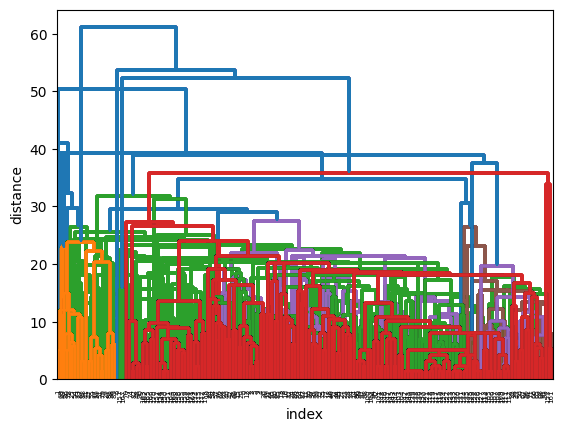

In [56]:
files = {}

for my_ngram in range(1,no_ngram+1):
    df1 = pd.DataFrame()
    for i,j in site_df[site_df["ngram"]==my_ngram].groupby("sname"):
        sname = i
        temp_df = pd.DataFrame({"Word":j["Word"].values})
        temp_df['sname'] = 1
        temp_df.set_index("Word", inplace=True)
        temp_transpose = temp_df.T
        temp_transpose["sname"] = sname
        # temp_transpose['total # of words'] = len(j["Word"].values)
        df1 = pd.concat([df1,temp_transpose],axis=0)
    df1.set_index("sname", inplace=True)
    df1.fillna(0, inplace=True)
    file_name = f"{my_ngram}NG Preprocessed data"
    files[file_name] = df1.reset_index()
    y = aggclust(df1, no_of_clusters)
    df1["my_cluster"] = y

    clusters_df = pd.DataFrame(columns=["cluster", "Sites", "ngram","# of sites"])
    for i,j in df1.groupby("my_cluster"):
        cluster_data = {
            "cluster": i,
            "Sites": j.index.tolist(),
            "ngram": my_ngram,
            "# of sites": len(j.index.tolist())
            }
        clusters_df = pd.concat([clusters_df, pd.DataFrame([cluster_data])], ignore_index=True)
    #-----------------------Site Name clustering-----------------------#
    file_name = f"{my_ngram}NG site Clusters"
    files[file_name] = clusters_df
    #-----------------------All 189 clusters-----------------------#
    all_clus_df = df1.copy()
    all_clus_df.drop(columns=["my_cluster"], inplace=True)
    all_clus_dff = formcluters(all_clus_df, len(all_clus_df)-2)
    all_clus_dff.set_index('sname',inplace=True)
    # sort by all columns
    all_clus_dff=all_clus_dff.sort_values(by=all_clus_dff.columns.to_list(), ascending=True)
    all_clus_dff.to_csv(f"{output_path}Forced_Clusters_{my_ngram}_ngram.csv")
    df1.drop(columns=["my_cluster"], inplace=True)
    #-----------------------Site Content clustering-----------------------#
    df2 = df1.T
    y1 = aggclust(df2, no_of_clusters)
    df2["my_cluster"] = y1
    clusters_df = pd.DataFrame(columns=["cluster", "Words", "ngram","# of words"])
    for i,j in df2.groupby("my_cluster"):
        cluster_data = {
            "cluster": i,
            "Words": j.index.tolist(), 
            "ngram": my_ngram,
            "# of words": len(j.index.tolist())
            }
        clusters_df = pd.concat([clusters_df, pd.DataFrame([cluster_data])], ignore_index=True)
    file_name = f"{my_ngram}NG Site Content Clusters"
    files[file_name] = clusters_df


### Using excelwriter to write all the above generated clustering results to output folder in an excel file.


In [57]:
writer = pd.ExcelWriter(f'{output_path} All Ngrams Site name and content clusters.xlsx', engine='xlsxwriter')
for file_name in files.keys():
    files[file_name].to_excel(writer, sheet_name=file_name, index = False)
writer.close()

## Grouping the site names 

In [58]:
files = os.listdir(mining_path)
group_by_sitename = pd.DataFrame(columns=["Site Name", "file"])
for file in files:
    if file.endswith(".docx"):
        data = {
            'Site Name': file.split(";")[0].replace(".docx","") if ";" in file else file.replace(".docx",""),
            'file': file.split(";")[1].replace(".docx","") if ";" in file else np.nan,
        }
        temp_site_df =  pd.DataFrame([data])
        group_by_sitename = pd.concat([group_by_sitename,temp_site_df], ignore_index=True)
group_by_sitename.to_csv(f'{output_path}/group_by_sitename.csv')

## Code block to generate the Top_1000_words from file names and paths for BI tagging

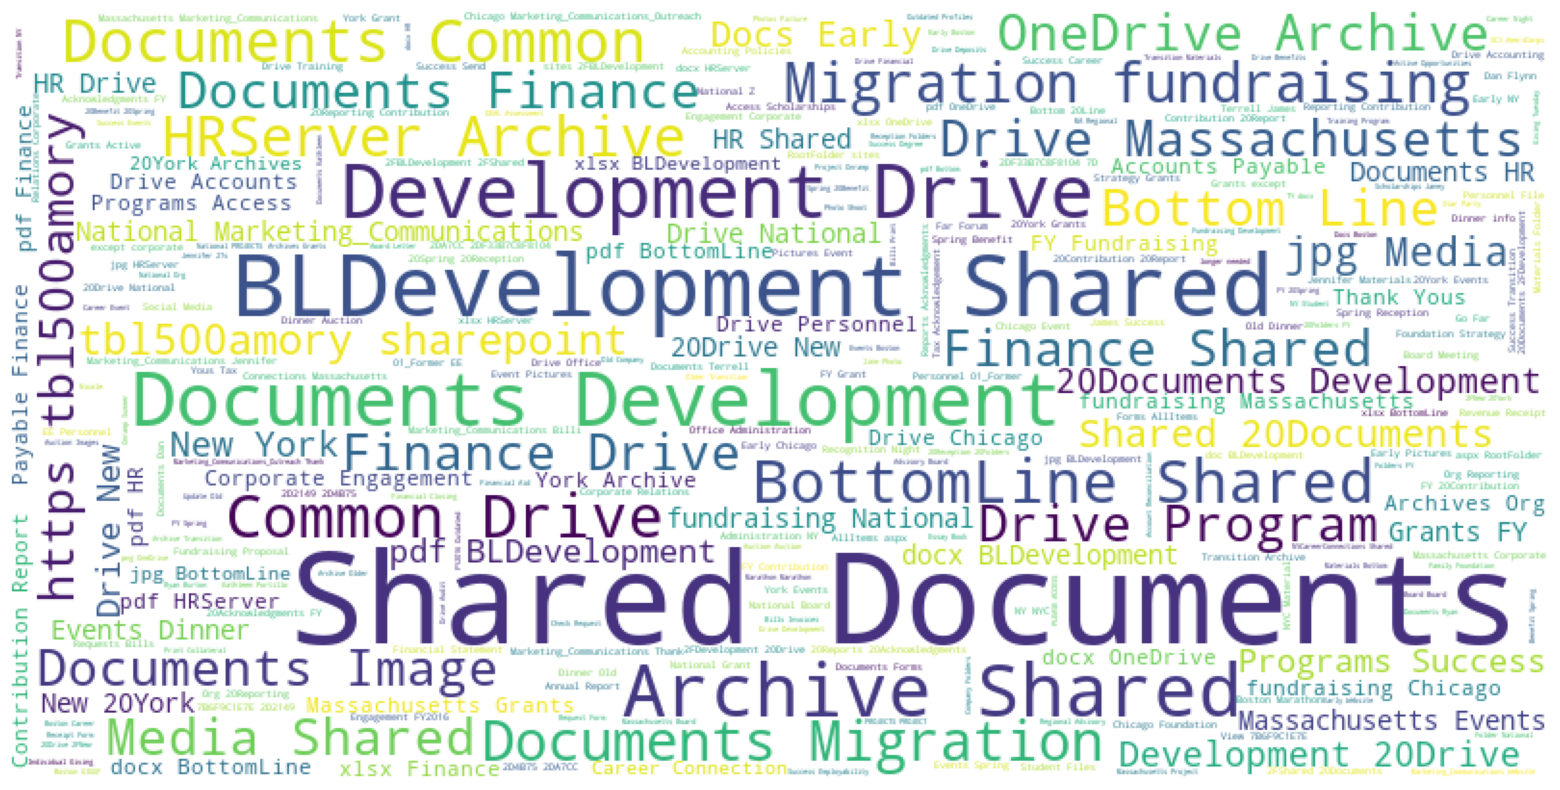

In [59]:
files=pd.read_excel(r'FilePaths.xlsx')
all_words = []
files["Full Link"].fillna("", inplace=True)
stop_words = ['bottom', "line","bottom line","jpeg","docx"]
for line in files["Full Link"].values:
    line= line.replace("sites/", "")
    line = line.replace("BottomLine/Shared Documents/BL Announcements", "")
    # use regex to add a space before and after a / symbol
    line = re.sub(r'(?<=[^/])/(?=[^/])', r' ', line)
    words = line.split("/")
    words = [word.strip() for word in words if word.lower() not in stop_words]
    all_words.extend(words)
wordcloud = WordCloud(width=800, height=400, background_color="white", max_words = top_words).generate(" ".join(all_words))
#saving the top_1000_words of the wordcloud
Top_1000_words=pd.DataFrame(wordcloud.words_.keys(),columns=["Word"]).to_csv(f'{output_path}/Top_1000_words.csv',index=False)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()